# Interface

This is a python notebook that will let us interact with the our runs and models.

In [7]:
import os
import gym
import csv
import ast
import numpy as np
import torch as th
from io import StringIO
from datetime import datetime
import json

from Base_env import Base_env
from Reference_env import Reference_env
from RL_env import RL_env

from stable_baselines3 import SAC
import matplotlib
import matplotlib.pyplot as plt
from run_learning import run_learning

def evaluate(model, param_dict, size):
    
    param_dict["test"] = True

    param_dict["initial_state"] = [size, size, 0, 0]

    test_dynamical_env = Base_env(param_dict)
    test_reference_env = Reference_env(param_dict)
    test_env = RL_env(test_dynamical_env, test_reference_env, param_dict, path)

    obs = test_env.reset()
    done = False
    while not done:
        action, _states = model.predict(obs)
        obs, rewards, done, info = test_env.step(action)

    learned, desired, zero = test_env.render()
    
    param_dict["test"] = False
    
    fig, axs = plt.subplots(2)

    axs[0].plot(learned, label='learned')
    axs[0].plot(desired, label='desired')
    axs[0].title("Amplitude: {}".format(size))
    axs[0].legend()

    axs[1].plot(zero, label="zero")
    axs[1].title("Amplitude: {} - Zero".format(size))

    fig.show()

In [8]:
path="./Run_Test_slight_zero"

In [14]:
with open(os.path.join(path, "param_save.csv"), newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    param_dict = next(reader)
    
for key in param_dict.keys():
    param_dict[key] = ast.literal_eval(param_dict[key])
    
best_model = SAC.load(os.path.join(path, "best_model"))

total_timesteps = param_dict['total_timesteps']

latest_model = SAC.load(os.path.join(path, "rl_model_{}_steps".format(total_timesteps)))

param_dict

{'dt': '0.1',
 'init_low': '-10',
 'init_high': '10',
 'test': 'False',
 'total_time': '10',
 'total_timesteps': '1000000',
 'cost_weights': '[1, 0.2, 0]',
 'test_sizes': '[0.2, 1, 3]',
 'b': '-2',
 'action_high': '10',
 'action_low': '-10',
 'internal_matrix': '[[0, -1], [1, 0]]',
 'path_matrix': '[0, 1]',
 'policy_kwarg': "{'activation_fn': <class 'torch.nn.modules.activation.Tanh'>}",
 'eval_freq': '50000',
 'save_freq': '100000',
 'gamma': '0.98'}

In [12]:
evaluate(latest_model, param_dict, 3)

TypeError: unsupported operand type(s) for //: 'str' and 'str'

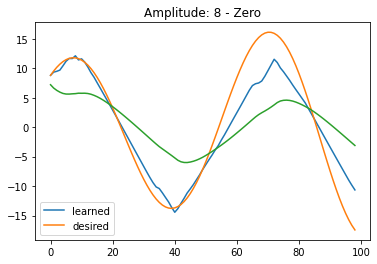

In [11]:
evaluate(best_model, param_dict, 8)